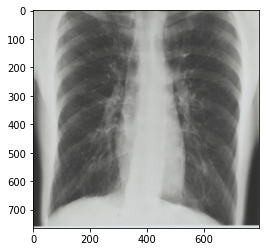

In [3]:
%matplotlib inline
from IPython.display import display, Math, Latex

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('xray.jpg')

# display the image
plt.imshow(img, cmap='gray')

(array([  494., 25812., 11033.,  6029., 21696., 55977., 60968., 92087.,
        90285., 84900., 76331., 68066., 46523., 52880., 47631., 41533.,
        36674., 33182., 22884., 24900., 22069., 20801., 18759., 17702.,
        13309., 17932., 17381., 18352., 19710., 20434., 19868., 15817.,
        23095., 26617., 31546., 36546., 41388., 35165., 54626., 70110.,
        78993., 85456., 97963., 67027., 23569.,  7590.,  4062.,  5835.,
         4728.,  1221.]),
 array([ 44.  ,  47.84,  51.68,  55.52,  59.36,  63.2 ,  67.04,  70.88,
         74.72,  78.56,  82.4 ,  86.24,  90.08,  93.92,  97.76, 101.6 ,
        105.44, 109.28, 113.12, 116.96, 120.8 , 124.64, 128.48, 132.32,
        136.16, 140.  , 143.84, 147.68, 151.52, 155.36, 159.2 , 163.04,
        166.88, 170.72, 174.56, 178.4 , 182.24, 186.08, 189.92, 193.76,
        197.6 , 201.44, 205.28, 209.12, 212.96, 216.8 , 220.64, 224.48,
        228.32, 232.16, 236.  ]),
 <a list of 50 Patch objects>)

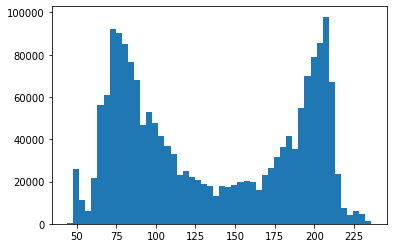

In [4]:
# convert our image into a numpy array
img = np.asarray(img)

# put pixels in a 1D array by flattening out img array
flat = img.flatten()

# show the histogram
plt.hist(flat, bins=50)

In [5]:
# create our own histogram function
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

# execute our histogram function
hist = get_histogram(flat, 256)

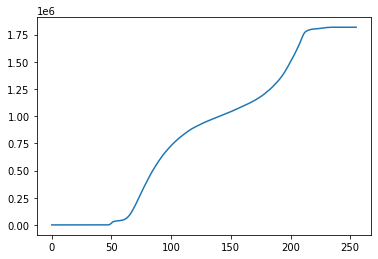

In [6]:
# create our cumulative sum function
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the fn
cs = cumsum(hist)

# display the result
plt.plot(cs)

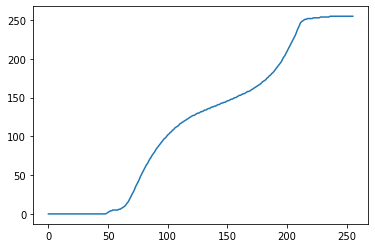

In [7]:
# numerator & denomenator
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# re-normalize the cumsum
cs = nj / N

# cast it back to uint8 since we can't use floating point values in images
cs = cs.astype('uint8')

plt.plot(cs)

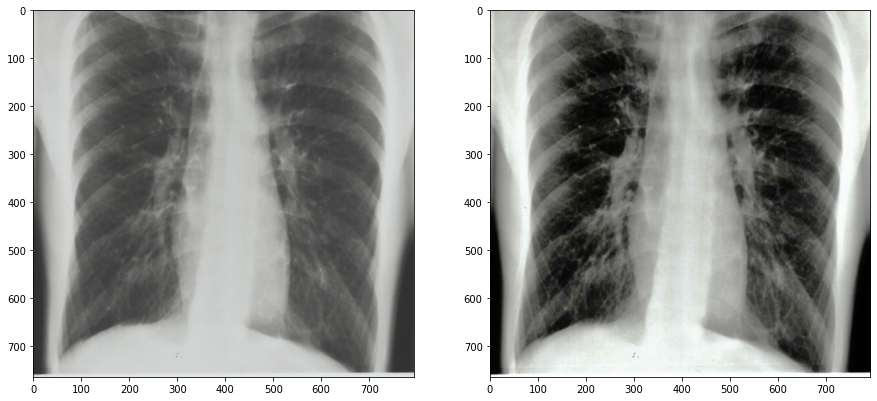

In [8]:
# get the value from cumulative sum for every index in flat, and set that as img_new
img_new = cs[flat]

# put array back into original shape since we flattened it
img_new = np.reshape(img_new, img.shape)

# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')

plt.show(block=True)

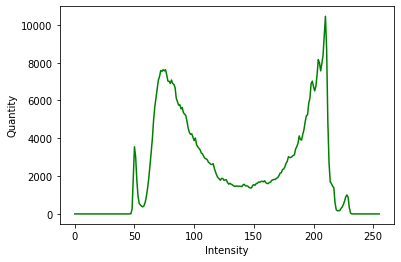

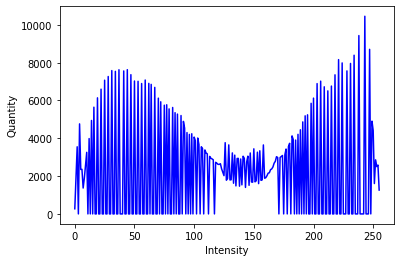

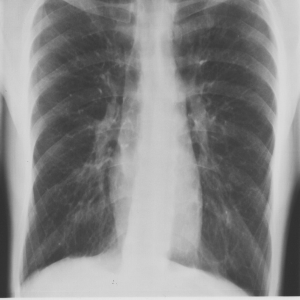

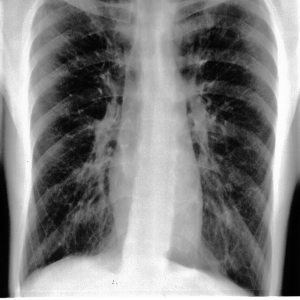

In [15]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt

image_arr = cv2.imread('xray.jpg', cv2.IMREAD_GRAYSCALE)



height = image_arr.shape[0]
width = image_arr.shape[1]
intensity_count = np.zeros(256)

for i in range(height):
  for j in range(width):
    intensity_count[image_arr[i][j]]+=1

#plotting
plt.plot(intensity_count,'g',label='Lung')
plt.ylabel('Quantity')
plt.xlabel('Intensity')
plt.show()

intensity_count_eq = np.zeros(256)
eq_img= cv2.equalizeHist(image_arr)

for i in range(height):
  for j in range(width):
    intensity_count_eq [eq_img[i][j]]+=1

#plotting
plt.plot(intensity_count_eq,'b',label='Lung Eq')
plt.ylabel('Quantity')
plt.xlabel('Intensity')
plt.show()



#histogram equalization
image_arr=cv2.resize(image_arr,(300,300))
eq_img=cv2.resize(eq_img,(300,300))

cv2_imshow( image_arr)
cv2_imshow(eq_img)


source : 

https://ashleyaberneithy.wordpress.com/2011/08/08/automating-radiology-detecting-lung-nodules-using-morphological-image-processing-in-f/

https://medium.com/hackernoon/histogram-equalization-in-python-from-scratch-ebb9c8aa3f23#:~:text=Histogram%20Equalization%20is%20one%20of,more%20equal%20across%20the%20board.